### <span style = "color:orange">1. Introduction<span>

#### <span style="color:green">1.1. Project purpose</span>

Xây dựng và đánh giá tập hợp các mô hình dự báo chuỗi thời gian để dự đoán nhiệt độ cực đại hàng ngày tại các khu vực đô thị và ven biển Việt Nam. Dự án áp dụng cả thuật toán Machine Learning truyền thống và Deep Learning hiện đại nhằm cải thiện độ chính xác dự báo so với các phương pháp thống kê thông thường.

<b>Nguồn dữ liệu</b>: Bộ dữ liệu ERA5 (ECMWF) với các bản ghi nhiệt độ từ 1990 đến 2024, được xử lý và biến đổi để huấn luyện các mô hình như Random Forest, XGBoost, LSTM, Transformer, TFT, và N-BEATS.

<b>Kết quả</b>: Đánh giá hiệu năng giữa các mô hình qua nhiều kịch bản thực nghiệm và đề xuất hệ thống cảnh báo nhiệt độ sớm ứng dụng thực tế.

#### <span style="color:green">1.2. Data source and description</span>

<h4>Thông tin dữ liệu trong đề tài:</h4>

<ul>
<li><b>Thời gian thu thập:</b> từ năm <b>1990 đến 2024</b></li>
<li><b>Định dạng ban đầu:</b> .grib, sau đó chuyển đổi sang .csv để xử lý</li>
</ul>

<h4>Các biến số chính trong tập dữ liệu:</h4>

<table>
<thead>
<tr>
<th>Tên cột dữ liệu</th>
<th>Ý nghĩa</th>
<th>Đơn vị đo</th>
</tr>
</thead>
<tbody>
<tr><td><code>NAME</code></td><td>Tên tỉnh/thành phố nơi thu thập dữ liệu</td><td>-</td></tr>
<tr><td><code>LATITUDE</code></td><td>Vĩ độ địa lý của điểm đo</td><td>Độ</td></tr>
<tr><td><code>LONGITUDE</code></td><td>Kinh độ địa lý của điểm đo</td><td>Độ</td></tr>
<tr><td><code>YMD</code></td><td>Ngày/tháng/năm đo đạc</td><td>dd/mm/yyyy</td></tr>
<tr><td><code>YEAR</code></td><td>Năm đo đạc</td><td>Năm</td></tr>
<tr><td><code>MONTH</code></td><td>Tháng đo đạc</td><td>Tháng</td></tr>
<tr><td><code>DAY</code></td><td>Ngày đo đạc</td><td>Ngày</td></tr>
<tr><td><code>TEMP_max</code></td><td>Nhiệt độ không khí cực đại trong ngày</td><td>°C</td></tr>
<tr><td><code>TEMP_ave</code></td><td>Nhiệt độ trung bình trong ngày</td><td>°C</td></tr>
<tr><td><code>DEW_ave</code></td><td>Điểm sương trung bình trong ngày</td><td>°C</td></tr>
<tr><td><code>DEW_max</code></td><td>Điểm sương cao nhất trong ngày</td><td>°C</td></tr>
<tr><td><code>RH_ave</code></td><td>Độ ẩm tương đối trung bình trong ngày</td><td>%</td></tr>
<tr><td><code>RH_max</code></td><td>Độ ẩm tương đối cực đại trong ngày</td><td>%</td></tr>
<tr><td><code>AT_ave</code></td><td>Nhiệt độ cảm nhận trung bình trong ngày (Apparent Temp.)</td><td>°C</td></tr>
<tr><td><code>AT_max</code></td><td>Nhiệt độ cảm nhận cao nhất trong ngày</td><td>°C</td></tr>
</tbody>
</table>

<p><b>Biến mục tiêu chính:</b></p>
<ul>
<li><code>TEMP_max</code> — Nhiệt độ không khí cực đại hàng ngày (°C)</li>
</ul>

<p><b>Lưu ý:</b> Dữ liệu gốc của ERA5 có thể chứa giá trị thiếu, giá trị ngoại lai và một số dị bản khí tượng đặc thù. Do đó, quá trình làm sạch dữ liệu, xử lý giá trị thiếu, phát hiện ngoại lệ và chuẩn hóa dữ liệu là các bước bắt buộc trước khi tiến hành huấn luyện và dự báo.</p>

In [40]:
match_type = {
    'NAME'       : 'Categorical',        # Tên tỉnh/thành phố (chuỗi)
    'LATITUDE'   : 'Numerical',          # Vĩ độ (°)
    'LONGITUDE'  : 'Numerical',          # Kinh độ (°)
    'YMD'        : 'Datetime',           # Ngày/tháng/năm (dd/mm/yyyy)
    'YEAR'       : 'Numerical',          # Năm (năm)
    'MONTH'      : 'Numerical',          # Tháng (1-12)
    'DAY'        : 'Numerical',          # Ngày (1-31)

    'TEMP_max'   : 'Numerical',          # Nhiệt độ cực đại trong ngày (°C)
    'TEMP_ave'   : 'Numerical',          # Nhiệt độ trung bình trong ngày (°C)
    'DEW_ave'    : 'Numerical',          # Điểm sương trung bình trong ngày (°C)
    'DEW_max'    : 'Numerical',          # Điểm sương cực đại trong ngày (°C)
    'RH_ave'     : 'Numerical',          # Độ ẩm tương đối trung bình trong ngày (%)
    'RH_max'     : 'Numerical',          # Độ ẩm tương đối cực đại trong ngày (%)
    'AT_ave'     : 'Numerical',          # Nhiệt độ cảm nhận trung bình trong ngày (°C)
    'AT_max'     : 'Numerical'           # Nhiệt độ cảm nhận cực đại trong ngày (°C)
}

#### <span style="color:green">1.3. Goals</span>

![Ảnh chụp màn hình 2025-06-24 210616.png](<attachment:Ảnh chụp màn hình 2025-06-24 210616.png>)
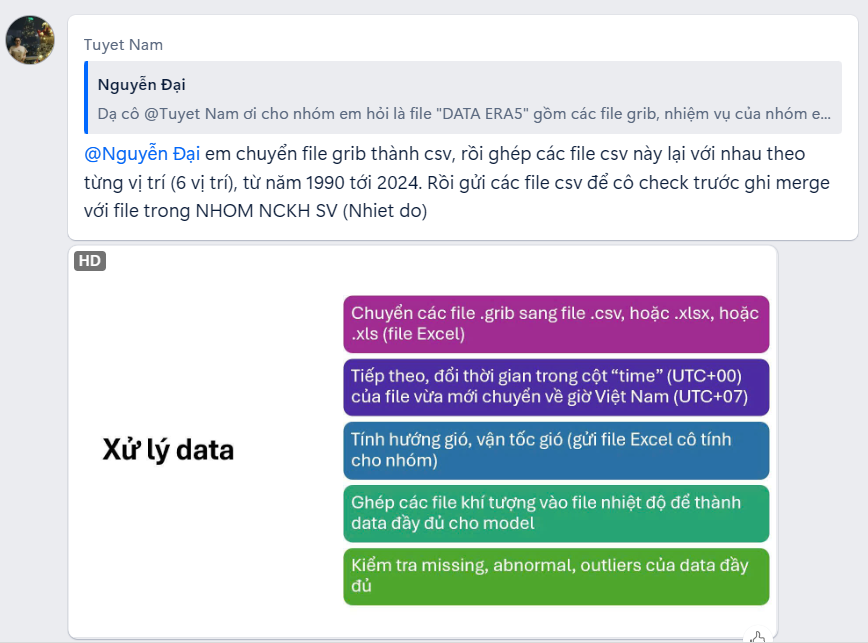

### <span style="color:orange">2. Import Libraries</span>

#### <span style="color:green">2.1. Configuration and display settings</span>

In [41]:
import sys
sys.path.append("../")  # đường dẫn đến thư mục chứa src

from src import (config, 
                 dataset, 
                 features, 
                 plots)

#### <span style="color:green">2.2. Required Python packages</span>

In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import metpy
import metpy.calc

from metpy.units import units
from copy        import deepcopy

### <span style="color:orange">3.Data Preprocessing</span>

#### <span style="color:green">3.1. Chuyển các file .grib sang file .csv hoặc .xlsx	, hoặc .xls (file Excel)</span>

In [43]:
src_CaMau = dict({"CaMau_SurPres"     : list(["../data/raw/Ca Mau/.grib/CM_SurPres_1990_2002.grib",
                                              "../data/raw/Ca Mau/.grib/CM_SurPres_2003_2015.grib",
                                              "../data/raw/Ca Mau/.grib/CM_SurPres_2016_2024.grib"]),
                   "CaMau_TotalCloud" : list(["../data/raw/Ca Mau/.grib/CM_TotalCloud_1990_2002.grib",
                                              "../data/raw/Ca Mau/.grib/CM_TotalCloud_2003_2015.grib",
                                              "../data/raw/Ca Mau/.grib/CM_TotalCloud_2016_2024.grib"]),
                   "CaMau_TotalPre"   : list(["../data/raw/Ca Mau/.grib/CM_TotalPre_1990_2002.grib",
                                              "../data/raw/Ca Mau/.grib/CM_TotalPre_2003_2015.grib",
                                              "../data/raw/Ca Mau/.grib/CM_TotalPre_2016_2024.grib"]),
                   "CaMau_u10"        : list(["../data/raw/Ca Mau/.grib/CM_u10_1990_2002.grib",
                                              "../data/raw/Ca Mau/.grib/CM_u10_2003_2015.grib",
                                              "../data/raw/Ca Mau/.grib/CM_u10_2016_2024.grib"]),
                   "CaMau_v10"        : list(["../data/raw/Ca Mau/.grib/CM_v10_1990_2002.grib",
                                              "../data/raw/Ca Mau/.grib/CM_v10_2003_2015.grib",
                                              "../data/raw/Ca Mau/.grib/CM_v10_2016_2024.grib"])})


src_NoiBai = dict({"NB_SurPres"       : list(["../data/raw/Noi Bai/.grib/NB_SurPres_1990_2002.grib",
                                              "../data/raw/Noi Bai/.grib/NB_SurPres_2003_2015.grib",
                                              "../data/raw/Noi Bai/.grib/NB_SurPres_2016_2024.grib"]),
                    "NB_TotalCloud"   : list(["../data/raw/Noi Bai/.grib/NB_TotalCloud_1990_2002.grib",
                                              "../data/raw/Noi Bai/.grib/NB_TotalCloud_2003_2015.grib",
                                              "../data/raw/Noi Bai/.grib/NB_TotalCloud_2016_2024.grib"]),
                    "NB_TotalPre"     : list(["../data/raw/Noi Bai/.grib/NB_TotalPre_1990_2002.grib",
                                              "../data/raw/Noi Bai/.grib/NB_TotalPre_2003_2015.grib",
                                              "../data/raw/Noi Bai/.grib/NB_TotalPre_2016_2024.grib"]),
                    "NB_u10"          : list(["../data/raw/Noi Bai/.grib/NB_u10_1990_2002.grib",
                                              "../data/raw/Noi Bai/.grib/NB_u10_2003_2015.grib",
                                              "../data/raw/Noi Bai/.grib/NB_u10_2016_2024.grib"]),
                    "NB_v10"          : list(["../data/raw/Noi Bai/.grib/NB_v10_1990_2002.grib",
                                              "../data/raw/Noi Bai/.grib/NB_v10_2003_2015.grib",
                                              "../data/raw/Noi Bai/.grib/NB_v10_2016_2024.grib"])})


src_QuyNhon = dict({"QN_SurPres"      : list(["../data/raw/Quy Nhon/.grib/QN_SurPres_1990_2002.grib",
                                              "../data/raw/Quy Nhon/.grib/QN_SurPres_2003_2015.grib",
                                              "../data/raw/Quy Nhon/.grib/QN_SurPres_2016_2024.grib"]),
                    "QN_TotalCloud"   : list(["../data/raw/Quy Nhon/.grib/QN_TotalCloud_1990_2002.grib",
                                              "../data/raw/Quy Nhon/.grib/QN_TotalCloud_2003_2015.grib",
                                              "../data/raw/Quy Nhon/.grib/QN_TotalCloud_2016_2024.grib"]),
                    "QN_TotalPre"     : list(["../data/raw/Quy Nhon/.grib/QN_TotalPre_1990_2002.grib",
                                              "../data/raw/Quy Nhon/.grib/QN_TotalPre_2003_2015.grib",
                                              "../data/raw/Quy Nhon/.grib/QN_TotalPre_2016_2024.grib"]),
                    "QN_u10"          : list(["../data/raw/Quy Nhon/.grib/QN_u10_1990_2002.grib",
                                              "../data/raw/Quy Nhon/.grib/QN_u10_2003_2015.grib",
                                              "../data/raw/Quy Nhon/.grib/QN_u10_2016_2024.grib"]),
                    "QN_v10"          : list(["../data/raw/Quy Nhon/.grib/QN_v10_1990_2002.grib",
                                              "../data/raw/Quy Nhon/.grib/QN_v10_2003_2015.grib",
                                              "../data/raw/Quy Nhon/.grib/QN_v10_2016_2024.grib"])})


src_TSN = dict({"TSN_SurPres"         : list(["../data/raw/TSN/.grib/TSN_Press_1990_2002.grib",
                                              "../data/raw/TSN/.grib/TSN_Press_2003_2015.grib",
                                              "../data/raw/TSN/.grib/TSN_Press_2016_2024.grib"]),
                 "TSN_TotalCloud"     : list(["../data/raw/TSN/.grib/TSN_TotalCloud_1990_2002.grib",
                                              "../data/raw/TSN/.grib/TSN_TotalCloud_2003_2015.grib",
                                              "../data/raw/TSN/.grib/TSN_TotalCloud_2016_2024.grib"]),
                 "TSN_TotalPre"       : list(["../data/raw/TSN/.grib/TSN_TotalPre_1990_2002.grib",
                                              "../data/raw/TSN/.grib/TSN_TotalPre_2003_2015.grib",
                                              "../data/raw/TSN/.grib/TSN_TotalPre_2016_2024.grib"]),
                 "TSN_u10"            : list(["../data/raw/TSN/.grib/TSN_u10_1990_2002.grib",
                                              "../data/raw/TSN/.grib/TSN_u10_2003_2015.grib",
                                              "../data/raw/TSN/.grib/TSN_u10_2016-2023.grib"]),
                 "TSN_v10"            : list(["../data/raw/TSN/.grib/TSN_v10_1990_2002.grib",
                                              "../data/raw/TSN/.grib/TSN_v10_2003_2015.grib",
                                              "../data/raw/TSN/.grib/TSN_v10_2016_2023.grib"])})

src = src_CaMau | src_NoiBai | src_QuyNhon | src_TSN

In [44]:
for var_name, file_list in src.items():
    for file_path in file_list:
        # Lấy thư mục chứa file .grib
        grib_folder = os.path.dirname(file_path)

        # Thư mục .csv cùng cấp với .grib
        csv_folder = os.path.join(os.path.dirname(grib_folder), '.csv')
        os.makedirs(csv_folder, exist_ok=True)

        # Tên file .csv trùng với tên file .grib nhưng đổi đuôi
        file_name = os.path.basename(file_path).replace(".grib", ".csv")

        # File đích nằm trong thư mục .csv
        des_file = os.path.join(csv_folder, file_name)

        # Nếu chưa tồn tại mới convert
        if not os.path.exists(des_file):
            print(f"~> Convert: {file_path} → {des_file}")
            dataset.grib_to_csv(file_path, des_file)
        else:
            print(f"✔️ Tồn tại: {des_file}, bỏ qua.")

✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_SurPres_1990_2002.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_SurPres_2003_2015.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_SurPres_2016_2024.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_TotalCloud_1990_2002.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_TotalCloud_2003_2015.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_TotalCloud_2016_2024.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_TotalPre_1990_2002.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_TotalPre_2003_2015.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_TotalPre_2016_2024.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_u10_1990_2002.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_u10_2003_2015.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_u10_2016_2024.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_v10_1990_2002.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca Mau\.csv\CM_v10_2003_2015.csv, bỏ qua.
✔️ Tồn tại: ../data/raw/Ca M

#### <span style="color:green">3.2. Tiếp theo, đổi thời gian trong cột "time" (UTC+00) của file vừa mới chuyển về giờ Việt Nam (UTC+07)</span>

In [45]:
for var_name, file_list in src.items():
    print(f"\n🔸 Đang xử lý biến: {var_name}")

    # Lấy thư mục chứa file csv gốc (từ file đầu tiên thôi)
    csv_path_example = file_list[0].replace(".grib", ".csv")
    csv_folder = os.path.dirname(csv_path_example)
    merged_folder = os.path.join(csv_folder, "merged")
    os.makedirs(merged_folder, exist_ok=True)

    # Tên file đích
    out_path = os.path.join(merged_folder, f"{var_name}_merged.csv")

    # Nếu file đích đã tồn tại thì bỏ qua
    if os.path.exists(out_path):
        print(f"⚠️ Đã tồn tại: {out_path}, bỏ qua.")
        continue

    df_list = []  # List lưu các DataFrame để concat

    for file_path in file_list:
        csv_path = file_path.replace(".grib", ".csv")

        if not os.path.exists(csv_path):
            print(f"❌ Không tìm thấy file: {csv_path}, bỏ qua.")
            continue

        df = pd.read_csv(csv_path)
        df = features.utc_to_vietnam(df, column_name="time")
        df_list.append(df)
        print(f"✔️ Đã xử lý: {csv_path}")

    # Nếu không có file nào thì bỏ qua merge
    if not df_list:
        print(f"⚠️ Không có dữ liệu cho {var_name}, bỏ qua.")
        continue

    # Nối tất cả DataFrame lại với nhau
    df_merged = pd.concat(df_list, ignore_index=True)

    # Lưu kết quả
    df_merged.to_csv(out_path, index=False)
    print(f"✅ Đã lưu: {out_path}")


🔸 Đang xử lý biến: CaMau_SurPres
⚠️ Đã tồn tại: ../data/raw/Ca Mau/.csv\merged\CaMau_SurPres_merged.csv, bỏ qua.

🔸 Đang xử lý biến: CaMau_TotalCloud
⚠️ Đã tồn tại: ../data/raw/Ca Mau/.csv\merged\CaMau_TotalCloud_merged.csv, bỏ qua.

🔸 Đang xử lý biến: CaMau_TotalPre
⚠️ Đã tồn tại: ../data/raw/Ca Mau/.csv\merged\CaMau_TotalPre_merged.csv, bỏ qua.

🔸 Đang xử lý biến: CaMau_u10
⚠️ Đã tồn tại: ../data/raw/Ca Mau/.csv\merged\CaMau_u10_merged.csv, bỏ qua.

🔸 Đang xử lý biến: CaMau_v10
⚠️ Đã tồn tại: ../data/raw/Ca Mau/.csv\merged\CaMau_v10_merged.csv, bỏ qua.

🔸 Đang xử lý biến: NB_SurPres
⚠️ Đã tồn tại: ../data/raw/Noi Bai/.csv\merged\NB_SurPres_merged.csv, bỏ qua.

🔸 Đang xử lý biến: NB_TotalCloud
⚠️ Đã tồn tại: ../data/raw/Noi Bai/.csv\merged\NB_TotalCloud_merged.csv, bỏ qua.

🔸 Đang xử lý biến: NB_TotalPre
⚠️ Đã tồn tại: ../data/raw/Noi Bai/.csv\merged\NB_TotalPre_merged.csv, bỏ qua.

🔸 Đang xử lý biến: NB_u10
⚠️ Đã tồn tại: ../data/raw/Noi Bai/.csv\merged\NB_u10_merged.csv, bỏ qua.

🔸

#### <span style="color:green">3.3. Ghép các file khí tượng vào file nhiệt độ để thành data đầy đủ cho model</span>

In [46]:
primary_key = ["time", "latitude", "longitude", "number", "step", "surface"]

##### <span style="color:tomato">Ca Mau</span>

In [47]:
df_CaMau_SurPres = pd.read_csv("../data/raw/Ca Mau/.csv/merged/CaMau_SurPres_merged.csv")
df_CaMau_SurPres = df_CaMau_SurPres.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols             = primary_key + ["sp"]
df_CaMau_SurPres = df_CaMau_SurPres[cols]

df_CaMau_SurPres

,time,latitude,longitude,number,step,surface,sp
0,1990-01-01 07:00:00+07:00,9.18,105.15,0,0 days,0.0,101113.875
1,1990-01-01 08:00:00+07:00,9.18,105.15,0,0 days,0.0,101226.625
2,1990-01-01 09:00:00+07:00,9.18,105.15,0,0 days,0.0,101284.060
3,1990-01-01 10:00:00+07:00,9.18,105.15,0,0 days,0.0,101299.810
4,1990-01-01 11:00:00+07:00,9.18,105.15,0,0 days,0.0,101257.560
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,9.18,105.15,0,0 days,0.0,101018.875
296732,2025-01-01 03:00:00+07:00,9.18,105.15,0,0 days,0.0,100989.690
296733,2025-01-01 04:00:00+07:00,9.18,105.15,0,0 days,0.0,100975.125
296734,2025-01-01 05:00:00+07:00,9.18,105.15,0,0 days,0.0,100982.625


In [48]:
df_CaMau_TotalCloud = pd.read_csv("../data/raw/Ca Mau/.csv/merged/CaMau_TotalCloud_merged.csv")
df_CaMau_TotalCloud = df_CaMau_TotalCloud.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols                = primary_key + ["tcc"]
df_CaMau_TotalCloud = df_CaMau_TotalCloud[cols]

df_CaMau_TotalCloud

,time,latitude,longitude,number,step,surface,tcc
0,1990-01-01 07:00:00+07:00,9.18,105.15,0,0 days,0.0,0.953957
1,1990-01-01 08:00:00+07:00,9.18,105.15,0,0 days,0.0,0.907932
2,1990-01-01 09:00:00+07:00,9.18,105.15,0,0 days,0.0,0.990317
3,1990-01-01 10:00:00+07:00,9.18,105.15,0,0 days,0.0,1.000000
4,1990-01-01 11:00:00+07:00,9.18,105.15,0,0 days,0.0,0.980892
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,9.18,105.15,0,0 days,0.0,0.987697
296732,2025-01-01 03:00:00+07:00,9.18,105.15,0,0 days,0.0,0.994615
296733,2025-01-01 04:00:00+07:00,9.18,105.15,0,0 days,0.0,0.994589
296734,2025-01-01 05:00:00+07:00,9.18,105.15,0,0 days,0.0,0.997653


In [49]:
df_CaMau_TotalPre = pd.read_csv("../data/raw/Ca Mau/.csv/merged/CaMau_TotalPre_merged.csv")
df_CaMau_TotalPre = df_CaMau_TotalPre.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols              = primary_key + ["tp"]
df_CaMau_TotalPre = df_CaMau_TotalPre[cols]

"""
    Chuyển time = time + step
    Chuyển step = 0 days
"""
df_CaMau_TotalPre["time"] = pd.to_datetime(df_CaMau_TotalPre["time"]) + pd.to_timedelta(df_CaMau_TotalPre["step"])
df_CaMau_TotalPre["step"] = "0 days"

df_CaMau_TotalPre

,time,latitude,longitude,number,step,surface,tp
0,1990-01-01 02:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN
1,1990-01-01 03:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN
2,1990-01-01 04:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN
3,1990-01-01 05:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN
4,1990-01-01 06:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN
...,...,...,...,...,...,...,...
301807,2025-01-01 09:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN
301808,2025-01-01 10:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN
301809,2025-01-01 11:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN
301810,2025-01-01 12:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN


In [50]:
df_CaMau_u10 = pd.read_csv("../data/raw/Ca Mau/.csv/merged/CaMau_u10_merged.csv")
df_CaMau_u10 = df_CaMau_u10.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols         = primary_key + ["u10"]
df_CaMau_u10 = df_CaMau_u10[cols]

df_CaMau_u10

,time,latitude,longitude,number,step,surface,u10
0,1990-01-01 07:00:00+07:00,9.18,105.15,0,0 days,0.0,-1.730067
1,1990-01-01 08:00:00+07:00,9.18,105.15,0,0 days,0.0,-3.418820
2,1990-01-01 09:00:00+07:00,9.18,105.15,0,0 days,0.0,-3.607658
3,1990-01-01 10:00:00+07:00,9.18,105.15,0,0 days,0.0,-3.620037
4,1990-01-01 11:00:00+07:00,9.18,105.15,0,0 days,0.0,-3.589621
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,9.18,105.15,0,0 days,0.0,1.017245
296732,2025-01-01 03:00:00+07:00,9.18,105.15,0,0 days,0.0,0.800543
296733,2025-01-01 04:00:00+07:00,9.18,105.15,0,0 days,0.0,0.520854
296734,2025-01-01 05:00:00+07:00,9.18,105.15,0,0 days,0.0,0.197162


In [51]:
df_CaMau_v10 = pd.read_csv("../data/raw/Ca Mau/.csv/merged/CaMau_v10_merged.csv")
df_CaMau_v10 = df_CaMau_v10.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols         = primary_key + ["v10"]
df_CaMau_v10 = df_CaMau_v10[cols]

df_CaMau_v10

,time,latitude,longitude,number,step,surface,v10
0,1990-01-01 07:00:00+07:00,9.18,105.15,0,0 days,0.0,-1.062786
1,1990-01-01 08:00:00+07:00,9.18,105.15,0,0 days,0.0,-0.559747
2,1990-01-01 09:00:00+07:00,9.18,105.15,0,0 days,0.0,-0.423493
3,1990-01-01 10:00:00+07:00,9.18,105.15,0,0 days,0.0,-0.534938
4,1990-01-01 11:00:00+07:00,9.18,105.15,0,0 days,0.0,-0.651215
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,9.18,105.15,0,0 days,0.0,-1.615114
296732,2025-01-01 03:00:00+07:00,9.18,105.15,0,0 days,0.0,-1.988596
296733,2025-01-01 04:00:00+07:00,9.18,105.15,0,0 days,0.0,-2.281485
296734,2025-01-01 05:00:00+07:00,9.18,105.15,0,0 days,0.0,-2.563956


In [52]:
datasets = list([df_CaMau_SurPres, df_CaMau_TotalCloud, df_CaMau_TotalPre, df_CaMau_u10, df_CaMau_v10])

for df in datasets:
    df = features.utc_to_vietnam(df,"time")

df_merged = dataset.merge_df(datasets = datasets,
                             on       = primary_key, 
                             how      = "outer")
df_merged

,time,latitude,longitude,number,step,surface,sp,tcc,tp,u10,v10
0,1990-01-01 02:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
1,1990-01-01 03:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
2,1990-01-01 04:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
3,1990-01-01 05:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
4,1990-01-01 06:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
301807,2025-01-01 09:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301808,2025-01-01 10:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301809,2025-01-01 11:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301810,2025-01-01 12:00:00+07:00,9.18,105.15,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN


In [53]:
dataset.compare_df(df_A = df_merged,
                   df_B = df_CaMau_TotalPre,
                   key  = primary_key)

,time,latitude,longitude,number,step,surface,_merge


In [54]:
df_merged.to_csv("../data/raw/Ca Mau/.csv/merged/CaMau_merged.csv", index=False)

##### <span style="color:tomato">Noi Bai</span>

In [55]:
df_NB_SurPres = pd.read_csv("../data/raw/Noi Bai/.csv/merged/NB_SurPres_merged.csv")
df_NB_SurPres = df_NB_SurPres.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols          = primary_key + ["sp"]
df_NB_SurPres = df_NB_SurPres[cols]

df_NB_SurPres

,time,latitude,longitude,number,step,surface,sp
0,1990-01-01 07:00:00+07:00,21.22,105.81,0,0 days,0.0,101200.690
1,1990-01-01 08:00:00+07:00,21.22,105.81,0,0 days,0.0,101243.375
2,1990-01-01 09:00:00+07:00,21.22,105.81,0,0 days,0.0,101326.125
3,1990-01-01 10:00:00+07:00,21.22,105.81,0,0 days,0.0,101342.125
4,1990-01-01 11:00:00+07:00,21.22,105.81,0,0 days,0.0,101299.125
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,21.22,105.81,0,0 days,0.0,101533.625
296732,2025-01-01 03:00:00+07:00,21.22,105.81,0,0 days,0.0,101481.810
296733,2025-01-01 04:00:00+07:00,21.22,105.81,0,0 days,0.0,101467.810
296734,2025-01-01 05:00:00+07:00,21.22,105.81,0,0 days,0.0,101481.440


In [56]:
df_NB_TotalCloud = pd.read_csv("../data/raw/Noi Bai/.csv/merged/NB_TotalCloud_merged.csv")
df_NB_TotalCloud = df_NB_TotalCloud.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols             = primary_key + ["tcc"]
df_NB_TotalCloud = df_NB_TotalCloud[cols]

df_NB_TotalCloud

,time,latitude,longitude,number,step,surface,tcc
0,1990-01-01 07:00:00+07:00,21.22,105.81,0,0 days,0.0,1.000000
1,1990-01-01 08:00:00+07:00,21.22,105.81,0,0 days,0.0,1.000000
2,1990-01-01 09:00:00+07:00,21.22,105.81,0,0 days,0.0,1.000000
3,1990-01-01 10:00:00+07:00,21.22,105.81,0,0 days,0.0,1.000000
4,1990-01-01 11:00:00+07:00,21.22,105.81,0,0 days,0.0,1.000000
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,21.22,105.81,0,0 days,0.0,0.000884
296732,2025-01-01 03:00:00+07:00,21.22,105.81,0,0 days,0.0,0.000884
296733,2025-01-01 04:00:00+07:00,21.22,105.81,0,0 days,0.0,0.003509
296734,2025-01-01 05:00:00+07:00,21.22,105.81,0,0 days,0.0,0.000884


In [57]:
df_NB_TotalPre = pd.read_csv("../data/raw/Noi Bai/.csv/merged/NB_TotalPre_merged.csv")
# df_CaMau_TotalPre = df_CaMau_TotalPre.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols           = primary_key + ["tp"]
df_NB_TotalPre = df_NB_TotalPre[cols]

"""
    Chuyển time = time + step
    Chuyển step = 0 days
"""
df_NB_TotalPre["time"] = pd.to_datetime(df_NB_TotalPre["time"]) + pd.to_timedelta(df_NB_TotalPre["step"])
df_NB_TotalPre["step"] = "0 days"

df_NB_TotalPre

,time,latitude,longitude,number,step,surface,tp
0,1990-01-01 02:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN
1,1990-01-01 03:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN
2,1990-01-01 04:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN
3,1990-01-01 05:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN
4,1990-01-01 06:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN
...,...,...,...,...,...,...,...
301807,2025-01-01 09:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN
301808,2025-01-01 10:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN
301809,2025-01-01 11:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN
301810,2025-01-01 12:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN


In [58]:
df_NB_u10 = pd.read_csv("../data/raw/Noi Bai/.csv/merged/NB_u10_merged.csv")
df_NB_u10 = df_NB_u10.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols      = primary_key + ["u10"]
df_NB_u10 = df_NB_u10[cols]

df_NB_u10

,time,latitude,longitude,number,step,surface,u10
0,1990-01-01 07:00:00+07:00,21.22,105.81,0,0 days,0.0,-0.036311
1,1990-01-01 08:00:00+07:00,21.22,105.81,0,0 days,0.0,-0.130352
2,1990-01-01 09:00:00+07:00,21.22,105.81,0,0 days,0.0,-0.000623
3,1990-01-01 10:00:00+07:00,21.22,105.81,0,0 days,0.0,-0.093693
4,1990-01-01 11:00:00+07:00,21.22,105.81,0,0 days,0.0,-0.014807
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,21.22,105.81,0,0 days,0.0,1.091775
296732,2025-01-01 03:00:00+07:00,21.22,105.81,0,0 days,0.0,1.048179
296733,2025-01-01 04:00:00+07:00,21.22,105.81,0,0 days,0.0,1.089591
296734,2025-01-01 05:00:00+07:00,21.22,105.81,0,0 days,0.0,0.816810


In [59]:
df_NB_v10 = pd.read_csv("../data/raw/Noi Bai/.csv/merged/NB_v10_merged.csv")
df_NB_v10 = df_NB_v10.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols      = primary_key + ["v10"]
df_NB_v10 = df_NB_v10[cols]

df_NB_v10

,time,latitude,longitude,number,step,surface,v10
0,1990-01-01 07:00:00+07:00,21.22,105.81,0,0 days,0.0,-1.178989
1,1990-01-01 08:00:00+07:00,21.22,105.81,0,0 days,0.0,-1.382355
2,1990-01-01 09:00:00+07:00,21.22,105.81,0,0 days,0.0,-1.390431
3,1990-01-01 10:00:00+07:00,21.22,105.81,0,0 days,0.0,-1.357133
4,1990-01-01 11:00:00+07:00,21.22,105.81,0,0 days,0.0,-1.328904
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,21.22,105.81,0,0 days,0.0,-1.617184
296732,2025-01-01 03:00:00+07:00,21.22,105.81,0,0 days,0.0,-1.514134
296733,2025-01-01 04:00:00+07:00,21.22,105.81,0,0 days,0.0,-1.358927
296734,2025-01-01 05:00:00+07:00,21.22,105.81,0,0 days,0.0,-1.029350


In [60]:
datasets = list([df_NB_SurPres, df_NB_TotalCloud, df_NB_TotalPre, df_NB_u10, df_NB_v10])

for df in datasets:
    df = features.utc_to_vietnam(df,"time")

df_merged = dataset.merge_df(datasets = datasets,
                             on       = primary_key, 
                             how      = "outer")
df_merged

,time,latitude,longitude,number,step,surface,sp,tcc,tp,u10,v10
0,1990-01-01 02:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
1,1990-01-01 03:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
2,1990-01-01 04:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
3,1990-01-01 05:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
4,1990-01-01 06:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
301807,2025-01-01 09:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301808,2025-01-01 10:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301809,2025-01-01 11:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301810,2025-01-01 12:00:00+07:00,21.22,105.81,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN


In [61]:
dataset.compare_df(df_A = df_merged,
                   df_B = df_NB_TotalPre,
                   key  = primary_key)

,time,latitude,longitude,number,step,surface,_merge


In [62]:
df_merged.to_csv("../data/raw/Noi Bai/.csv/merged/NB_merged.csv", index=False)

##### <span style="color:tomato">Quy Nhon</span>

In [63]:
df_QN_SurPres = pd.read_csv("../data/raw/Quy Nhon/.csv/merged/QN_SurPres_merged.csv")
df_QN_SurPres = df_QN_SurPres.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols          = primary_key + ["sp"]
df_QN_SurPres = df_QN_SurPres[cols]

df_QN_SurPres

,time,latitude,longitude,number,step,surface,sp
0,1990-01-01 07:00:00+07:00,13.77,109.22,0,0 days,0.0,99760.750
1,1990-01-01 08:00:00+07:00,13.77,109.22,0,0 days,0.0,99829.810
2,1990-01-01 09:00:00+07:00,13.77,109.22,0,0 days,0.0,99877.810
3,1990-01-01 10:00:00+07:00,13.77,109.22,0,0 days,0.0,99870.560
4,1990-01-01 11:00:00+07:00,13.77,109.22,0,0 days,0.0,99822.940
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,13.77,109.22,0,0 days,0.0,99774.810
296732,2025-01-01 03:00:00+07:00,13.77,109.22,0,0 days,0.0,99741.560
296733,2025-01-01 04:00:00+07:00,13.77,109.22,0,0 days,0.0,99704.940
296734,2025-01-01 05:00:00+07:00,13.77,109.22,0,0 days,0.0,99697.250


In [64]:
df_QN_TotalCloud = pd.read_csv("../data/raw/Quy Nhon/.csv/merged/QN_TotalCloud_merged.csv")
df_QN_TotalCloud = df_QN_TotalCloud.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols             = primary_key + ["tcc"]
df_QN_TotalCloud = df_QN_TotalCloud[cols]

df_QN_TotalCloud

,time,latitude,longitude,number,step,surface,tcc
0,1990-01-01 07:00:00+07:00,13.77,109.22,0,0 days,0.0,0.216676
1,1990-01-01 08:00:00+07:00,13.77,109.22,0,0 days,0.0,0.310115
2,1990-01-01 09:00:00+07:00,13.77,109.22,0,0 days,0.0,0.398267
3,1990-01-01 10:00:00+07:00,13.77,109.22,0,0 days,0.0,0.522678
4,1990-01-01 11:00:00+07:00,13.77,109.22,0,0 days,0.0,0.758055
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,13.77,109.22,0,0 days,0.0,1.000000
296732,2025-01-01 03:00:00+07:00,13.77,109.22,0,0 days,0.0,0.999556
296733,2025-01-01 04:00:00+07:00,13.77,109.22,0,0 days,0.0,0.992588
296734,2025-01-01 05:00:00+07:00,13.77,109.22,0,0 days,0.0,1.000000


In [65]:
df_QN_TotalPre = pd.read_csv("../data/raw/Quy Nhon/.csv/merged/QN_TotalPre_merged.csv")
df_QN_TotalPre = df_QN_TotalPre.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols           = primary_key + ["tp"]
df_QN_TotalPre = df_QN_TotalPre[cols]

"""
    Chuyển time = time + step
    Chuyển step = 0 days
"""
df_QN_TotalPre["time"] = pd.to_datetime(df_QN_TotalPre["time"]) + pd.to_timedelta(df_QN_TotalPre["step"])
df_QN_TotalPre["step"] = "0 days"

df_QN_TotalPre

,time,latitude,longitude,number,step,surface,tp
0,1990-01-01 02:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN
1,1990-01-01 03:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN
2,1990-01-01 04:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN
3,1990-01-01 05:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN
4,1990-01-01 06:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN
...,...,...,...,...,...,...,...
301807,2025-01-01 09:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN
301808,2025-01-01 10:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN
301809,2025-01-01 11:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN
301810,2025-01-01 12:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN


In [66]:
df_QN_u10 = pd.read_csv("../data/raw/Quy Nhon/.csv/merged/QN_u10_merged.csv")
df_QN_u10 = df_QN_u10.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols      = primary_key + ["u10"]
df_QN_u10 = df_QN_u10[cols]

df_QN_u10

,time,latitude,longitude,number,step,surface,u10
0,1990-01-01 07:00:00+07:00,13.77,109.22,0,0 days,0.0,1.752552
1,1990-01-01 08:00:00+07:00,13.77,109.22,0,0 days,0.0,1.309305
2,1990-01-01 09:00:00+07:00,13.77,109.22,0,0 days,0.0,0.713263
3,1990-01-01 10:00:00+07:00,13.77,109.22,0,0 days,0.0,-0.537644
4,1990-01-01 11:00:00+07:00,13.77,109.22,0,0 days,0.0,-1.432425
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,13.77,109.22,0,0 days,0.0,0.869516
296732,2025-01-01 03:00:00+07:00,13.77,109.22,0,0 days,0.0,1.026364
296733,2025-01-01 04:00:00+07:00,13.77,109.22,0,0 days,0.0,1.134291
296734,2025-01-01 05:00:00+07:00,13.77,109.22,0,0 days,0.0,1.277280


In [67]:
df_QN_v10 = pd.read_csv("../data/raw/Quy Nhon/.csv/merged/QN_v10_merged.csv")
df_QN_v10 = df_QN_v10.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols      = primary_key + ["v10"]
df_QN_v10 = df_QN_v10[cols]

df_QN_v10

,time,latitude,longitude,number,step,surface,v10
0,1990-01-01 07:00:00+07:00,13.77,109.22,0,0 days,0.0,-1.491451
1,1990-01-01 08:00:00+07:00,13.77,109.22,0,0 days,0.0,-1.587473
2,1990-01-01 09:00:00+07:00,13.77,109.22,0,0 days,0.0,-2.191437
3,1990-01-01 10:00:00+07:00,13.77,109.22,0,0 days,0.0,-2.980986
4,1990-01-01 11:00:00+07:00,13.77,109.22,0,0 days,0.0,-2.633120
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,13.77,109.22,0,0 days,0.0,-7.388910
296732,2025-01-01 03:00:00+07:00,13.77,109.22,0,0 days,0.0,-7.275086
296733,2025-01-01 04:00:00+07:00,13.77,109.22,0,0 days,0.0,-7.210753
296734,2025-01-01 05:00:00+07:00,13.77,109.22,0,0 days,0.0,-7.108362


In [68]:
datasets = list([df_QN_SurPres, df_QN_TotalCloud, df_QN_TotalPre, df_QN_u10, df_QN_v10])

for df in datasets:
    df = features.utc_to_vietnam(df,"time")

df_merged = dataset.merge_df(datasets = datasets,
                             on       = primary_key, 
                             how      = "outer")
df_merged

,time,latitude,longitude,number,step,surface,sp,tcc,tp,u10,v10
0,1990-01-01 02:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
1,1990-01-01 03:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
2,1990-01-01 04:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
3,1990-01-01 05:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
4,1990-01-01 06:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
301807,2025-01-01 09:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301808,2025-01-01 10:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301809,2025-01-01 11:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301810,2025-01-01 12:00:00+07:00,13.77,109.22,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN


In [69]:
dataset.compare_df(df_A = df_merged,
                   df_B = df_QN_TotalPre,
                   key  = primary_key)

,time,latitude,longitude,number,step,surface,_merge


In [70]:
df_merged.to_csv("../data/raw/Quy Nhon/.csv/merged/QN_merged.csv", index=False)

##### <span style="color:tomato">TSN</span>

In [71]:
df_TSN_SurPres = pd.read_csv("../data/raw/TSN/.csv/merged//TSN_SurPres_merged.csv")
df_TSN_SurPres = df_TSN_SurPres.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols           = primary_key + ["sp"]
df_TSN_SurPres = df_TSN_SurPres[cols]

df_TSN_SurPres

,time,latitude,longitude,number,step,surface,sp
0,1990-01-01 07:00:00+07:00,10.82,106.65,0,0 days,0.0,101014.560
1,1990-01-01 08:00:00+07:00,10.82,106.65,0,0 days,0.0,101125.125
2,1990-01-01 09:00:00+07:00,10.82,106.65,0,0 days,0.0,101191.000
3,1990-01-01 10:00:00+07:00,10.82,106.65,0,0 days,0.0,101204.690
4,1990-01-01 11:00:00+07:00,10.82,106.65,0,0 days,0.0,101144.310
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,10.82,106.65,0,0 days,0.0,100902.625
296732,2025-01-01 03:00:00+07:00,10.82,106.65,0,0 days,0.0,100878.440
296733,2025-01-01 04:00:00+07:00,10.82,106.65,0,0 days,0.0,100851.310
296734,2025-01-01 05:00:00+07:00,10.82,106.65,0,0 days,0.0,100858.190


In [72]:
df_TSN_TotalCloud = pd.read_csv("../data/raw/TSN/.csv/merged/TSN_TotalCloud_merged.csv")
df_TSN_TotalCloud = df_TSN_TotalCloud.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols              = primary_key + ["tcc"]
df_TSN_TotalCloud = df_TSN_TotalCloud[cols]

df_TSN_TotalCloud

,time,latitude,longitude,number,step,surface,tcc
0,1990-01-01 07:00:00+07:00,10.82,106.65,0,0 days,0.0,0.481978
1,1990-01-01 08:00:00+07:00,10.82,106.65,0,0 days,0.0,0.047294
2,1990-01-01 09:00:00+07:00,10.82,106.65,0,0 days,0.0,0.072710
3,1990-01-01 10:00:00+07:00,10.82,106.65,0,0 days,0.0,0.171540
4,1990-01-01 11:00:00+07:00,10.82,106.65,0,0 days,0.0,0.247749
...,...,...,...,...,...,...,...
296731,2025-01-01 02:00:00+07:00,10.82,106.65,0,0 days,0.0,1.000000
296732,2025-01-01 03:00:00+07:00,10.82,106.65,0,0 days,0.0,1.000000
296733,2025-01-01 04:00:00+07:00,10.82,106.65,0,0 days,0.0,1.000000
296734,2025-01-01 05:00:00+07:00,10.82,106.65,0,0 days,0.0,1.000000


In [73]:
df_TSN_TotalPre = pd.read_csv("../data/raw/TSN/.csv/merged/TSN_TotalPre_merged.csv")
df_TSN_TotalPre = df_TSN_TotalPre.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols            = primary_key + ["tp"]
df_TSN_TotalPre = df_TSN_TotalPre[cols]

"""
    Chuyển time = time + step
    Chuyển step = 0 days
"""
df_TSN_TotalPre["time"] = pd.to_datetime(df_TSN_TotalPre["time"]) + pd.to_timedelta(df_TSN_TotalPre["step"])
df_TSN_TotalPre["step"] = "0 days"

df_TSN_TotalPre

,time,latitude,longitude,number,step,surface,tp
0,1990-01-01 02:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN
1,1990-01-01 03:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN
2,1990-01-01 04:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN
3,1990-01-01 05:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN
4,1990-01-01 06:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN
...,...,...,...,...,...,...,...
301807,2025-01-01 09:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN
301808,2025-01-01 10:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN
301809,2025-01-01 11:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN
301810,2025-01-01 12:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN


In [74]:
df_TSN_u10 = pd.read_csv("../data/raw/TSN/.csv/merged/TSN_u10_merged.csv")
df_TSN_u10 = df_TSN_u10.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols       = primary_key + ["u10"]
df_TSN_u10 = df_TSN_u10[cols]

df_TSN_u10

,time,latitude,longitude,number,step,surface,u10
0,1990-01-01 07:00:00+07:00,10.82,106.65,0,0 days,0.0,-1.153124
1,1990-01-01 08:00:00+07:00,10.82,106.65,0,0 days,0.0,-1.249023
2,1990-01-01 09:00:00+07:00,10.82,106.65,0,0 days,0.0,-0.906748
3,1990-01-01 10:00:00+07:00,10.82,106.65,0,0 days,0.0,-0.539214
4,1990-01-01 11:00:00+07:00,10.82,106.65,0,0 days,0.0,-0.050856
...,...,...,...,...,...,...,...
288235,2024-01-01 02:00:00+07:00,10.82,106.65,0,0 days,0.0,0.238471
288236,2024-01-01 03:00:00+07:00,10.82,106.65,0,0 days,0.0,0.007349
288237,2024-01-01 04:00:00+07:00,10.82,106.65,0,0 days,0.0,-0.091048
288238,2024-01-01 05:00:00+07:00,10.82,106.65,0,0 days,0.0,0.149071


In [75]:
df_TSN_v10 = pd.read_csv("../data/raw/TSN/.csv/merged/TSN_v10_merged.csv")
df_TSN_v10 = df_TSN_v10.drop("valid_time", axis=1).drop_duplicates()

# Sắp xếp lại thứ tự cột
cols       = primary_key + ["v10"]
df_TSN_v10 = df_TSN_v10[cols]

df_TSN_v10

,time,latitude,longitude,number,step,surface,v10
0,1990-01-01 07:00:00+07:00,10.82,106.65,0,0 days,0.0,0.200311
1,1990-01-01 08:00:00+07:00,10.82,106.65,0,0 days,0.0,0.139859
2,1990-01-01 09:00:00+07:00,10.82,106.65,0,0 days,0.0,0.177749
3,1990-01-01 10:00:00+07:00,10.82,106.65,0,0 days,0.0,0.363851
4,1990-01-01 11:00:00+07:00,10.82,106.65,0,0 days,0.0,0.231467
...,...,...,...,...,...,...,...
288235,2024-01-01 02:00:00+07:00,10.82,106.65,0,0 days,0.0,0.835517
288236,2024-01-01 03:00:00+07:00,10.82,106.65,0,0 days,0.0,0.184498
288237,2024-01-01 04:00:00+07:00,10.82,106.65,0,0 days,0.0,-0.601880
288238,2024-01-01 05:00:00+07:00,10.82,106.65,0,0 days,0.0,-0.867619


In [76]:
datasets = list([df_TSN_SurPres, df_TSN_TotalCloud, df_TSN_TotalPre, df_TSN_u10, df_TSN_v10])

for df in datasets:
    df = features.utc_to_vietnam(df,"time")

df_merged = dataset.merge_df(datasets = datasets,
                             on       = primary_key, 
                             how      = "outer")
df_merged

,time,latitude,longitude,number,step,surface,sp,tcc,tp,u10,v10
0,1990-01-01 02:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
1,1990-01-01 03:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
2,1990-01-01 04:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
3,1990-01-01 05:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
4,1990-01-01 06:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
301807,2025-01-01 09:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301808,2025-01-01 10:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301809,2025-01-01 11:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN
301810,2025-01-01 12:00:00+07:00,10.82,106.65,0,0 days,0.0,NaN,NaN,NaN,NaN,NaN


In [77]:
dataset.compare_df(df_A = df_merged,
                   df_B = df_TSN_TotalPre,
                   key  = primary_key)

,time,latitude,longitude,number,step,surface,_merge


In [78]:
df_merged.to_csv("../data/raw/TSN/.csv/merged/TSN_merged.csv", index=False)

#### <span style="color:green">3.4. Kiểm tra missing, abnormal, outliers của data đầy đủ ~> Data Cleaning</span>

<h4>Các biến số chính trong tập dữ liệu:</h4>

<table>
<thead>
<tr>
<th>Tên cột dữ liệu</th>
<th>Ý nghĩa</th>
<th>Đơn vị đo</th>
</tr>
</thead>
<tbody>
<tr><td><code>sp</code></td><td>Áp suất khí quyển tại mặt đất</td><td>Pa</td></tr>
<tr><td><code>tcc</code></td><td>Tổng độ che phủ mây toàn phần</td><td>%</td></tr>
<tr><td><code>tp</code></td><td>Lượng mưa tích lũy</td><td>mm</td></tr>
<tr><td><code>u10</code></td><td>Thành phần vận tốc gió theo trục Đông-Tây ở độ cao 10m</td><td>m/s</td></tr>
<tr><td><code>v10</code></td><td>Thành phần vận tốc gió theo trục Bắc-Nam ở độ cao 10m</td><td>m/s</td></tr>
</tbody>
</table>


##### <span style="color:tomato">Missing</span>

In [79]:
numerical_features = ["sp", "tcc", "tp", "u10", "v10"]

src = list(["../data/raw/Ca Mau/.csv/merged/CaMau_merged.csv",
            "../data/raw/Noi Bai/.csv/merged/NB_merged.csv",
            "../data/raw/Quy Nhon/.csv/merged/QN_merged.csv",
            "../data/raw/TSN/.csv/merged/TSN_merged.csv"])

In [80]:
for file_path in src:
    df = pd.read_csv(file_path)
    station_name = os.path.basename(file_path).replace("_merged.csv", "")
    print(f"🔸 Trạm: {station_name}")

    dataset.ProportionMissing_aproach1(df[numerical_features])
    print()

🔸 Trạm: CaMau
sp     1.673890
tcc    1.673890
u10    1.673890
v10    1.673890
tp     1.681842
dtype: float64%

🔸 Trạm: NB
sp     1.673890
tcc    1.673890
u10    1.673890
v10    1.673890
tp     1.681842
dtype: float64%

🔸 Trạm: QN
sp     1.673890
tcc    1.673890
u10    1.673890
v10    1.673890
tp     1.681842
dtype: float64%

🔸 Trạm: TSN
sp     1.673890
tcc    1.673890
tp     1.681842
u10    4.488887
v10    4.488887
dtype: float64%



In [ ]:
df = dataset.HandleMissing_aproach2(df)

In [ ]:
dataset.ProportionMissing_aproach2(df)

In [ ]:
# df.to_csv("../data/processed/filled/Ca Mau_filled.csv", index = False)

##### <span style="color:tomato">Abnormal <~> Outlier</span>

In [ ]:
df = pd.read_csv("../data/processed/merged/Ca Mau_merged.csv",
                 index_col   = ["time"], 
                 parse_dates = True)

sns.boxplot(df["v10"])
plt.grid(True)

In [ ]:
ax = df.loc[:, "sp"].plot()

skip

In [ ]:
df = pd.read_csv("../data/processed/merged/Ca Mau_merged.csv")

dataset.ProportionMissing_aproach2(df)

In [ ]:
df = dataset.HandleMissing_aproach2(df)

In [ ]:
dataset.ProportionMissing_aproach2(df)

#### <span style="color:green">3.5. Tính hướng gió, vận tốc gió (gửi file Excel cô tính cho nhóm)</span>

In [ ]:
# for var_name, file_list in src.items():
#     df_merged
#     for file_path in file_list:
#         # Đọc file CSV
#         df = pd.read_csv(file_path)

#         # Ví dụ xử lý: đổi tên cột IN HOA
#         df = features.utc_to_vietnam(df, column_name = "time")

#         # Ghi đè lại file CSV đó luôn
#         df.to_csv(file_path, index=False)

#         print(f"~> Đã cập nhật: {file_path}")

### <span style="color:orange">4.Data Cleaning</span>

#### <span style="color:green">4.1. Handling missing values</span>

##### <span style="color:tomato">Missing Values<span>

In [ ]:
script.ProportionMissing_aproach2(
    data = train_df,
    # data = test_df
)

##### <span style="color:tomato">Replace Missing Values<span>

Numerical

In [ ]:
numerical   = train_df.select_dtypes(exclude=['object']).columns
script.ProportionMissing_aproach2(
    data = train_df[numerical],
    # data = test_df[numerical]
)

In [ ]:
train_df[numerical] = script.HandleMissing_aproach2(train_df[numerical])
test_df[numerical] = script.HandleMissing_aproach2(test_df[numerical])

Categorical

In [ ]:
categorical   = train_df.select_dtypes(include=['object']).columns

script.ProportionMissing_aproach2(
    data = train_df[categorical],
    # data = test_df[categorical.drop("class")]
)

In [ ]:
categorical   = train_df.select_dtypes(include=['object']).columns

train_df[categorical] = script.HandleMissing_aproach2(train_df[categorical])
test_df[categorical.drop("class")] = script.HandleMissing_aproach2(test_df[categorical.drop("class")])

##### <span style="color:tomato">Checking Missing values again</span>

In [ ]:
script.ProportionMissing_aproach2(
    data = train_df,
    # data = test_df
)

##### <span style="color:tomato">Explore "numerical" variables</span>

In [ ]:
train_df[numerical].value_counts()
# test_df[numerical].value_counts()

##### <span style="color:tomato">Explore "categorical" variables</span>

In [ ]:
train_df[categorical].value_counts()
# test_df[categorical.drop("class")].value_counts()

##### <span style="color:tomato">Explore "cap-shape" variables</span>

In [ ]:
train_df["cap-shape"].value_counts(dropna=False).head(50)
# test_df["cap-shape"].value_counts(dropna=False)

In [ ]:
train_df["cap-shape"].unique()

In [ ]:
valid_values = ['b', 'c', 'x', 'f', 'k', 's']
invalid_values = train_df[~train_df['cap-shape'].isin(valid_values)]
print(invalid_values['cap-shape'].unique())

##### <span style="color:tomato">Explore "cap-surface" variables</span>

In [ ]:
train_df["cap-surface"].value_counts(dropna=False)
# # test_df["cap-surface"].value_counts(dropna=False)

In [ ]:
train_df["cap-surface"].unique()

##### <span style="color:tomato">Explore "cap-color" variables</span>

In [ ]:
train_df["cap-color"].value_counts(dropna=False)
# # test_df["cap-color"].value_counts(dropna=False)

In [ ]:
train_df["cap-color"].unique()

##### <span style="color:tomato">Explore "does-bruise-or-bleed" variables</span>

In [ ]:
train_df["does-bruise-or-bleed"].value_counts(dropna=False)
# # test_df["does-bruise-or-bleed"].value_counts(dropna=False)

In [ ]:
train_df["does-bruise-or-bleed"].unique()

##### <span style="color:tomato">Explore "gill-attachment" variables</span>

In [ ]:
train_df["gill-attachment"].value_counts(dropna=False)
# # test_df["gill-attachment"].value_counts(dropna=False)

In [ ]:
train_df["gill-attachment"].unique()

##### <span style="color:tomato">Explore "gill-spacing" variables</span>

In [ ]:
train_df["gill-spacing"].value_counts(dropna=False)
# # test_df["gill-spacing"].value_counts(dropna=False)

In [ ]:
train_df["gill-spacing"].unique()

##### <span style="color:tomato">Explore "gill-color" variables</span>

In [ ]:
train_df["gill-color"].value_counts(dropna=False)
# # test_df["gill-color"].value_counts(dropna=False)

In [ ]:
train_df["gill-color"].unique()

##### <span style="color:tomato">Explore "stem-root" variables</span>

In [ ]:
train_df["stem-root"].value_counts(dropna=False)
# # test_df["stem-root"].value_counts(dropna=False)

In [ ]:
train_df["stem-root"].unique()

##### <span style="color:tomato">Explore "stem-surface" variables</span>

In [ ]:
train_df["stem-surface"].value_counts(dropna=False)
# # test_df["stem-surface"].value_counts(dropna=False)

In [ ]:
train_df["stem-surface"].unique()

##### <span style="color:tomato">Explore "stem-color" variables</span>

In [ ]:
train_df["stem-color"].value_counts(dropna=False)
# # test_df["stem-color"].value_counts(dropna=False)

In [ ]:
train_df["stem-color"].unique()

##### <span style="color:tomato">Explore "veil-type" variables</span>

In [ ]:
train_df["veil-type"].value_counts(dropna=False)
# # test_df["veil-type"].value_counts(dropna=False)

In [ ]:
train_df["veil-type"].unique()

##### <span style="color:tomato">Explore "veil-color" variables</span>

In [ ]:
train_df["veil-color"].value_counts(dropna=False)
# # test_df["veil-color"].value_counts(dropna=False)

In [ ]:
train_df["veil-color"].unique()

##### <span style="color:tomato">Explore "has-ring" variables</span>

In [ ]:
train_df["has-ring"].value_counts(dropna=False)
# # test_df["has-ring"].value_counts(dropna=False)

In [ ]:
train_df["has-ring"].unique()

##### <span style="color:tomato">Explore "ring-type" variables</span>

In [ ]:
train_df["ring-type"].value_counts(dropna=False)
# # test_df["ring-type"].value_counts(dropna=False)

In [ ]:
train_df["ring-type"].unique()

##### <span style="color:tomato">Explore "spore-print-color" variables</span>

In [ ]:
train_df["spore-print-color"].value_counts(dropna=False)
# # test_df["spore-print-color"].value_counts(dropna=False)

In [ ]:
train_df["spore-print-color"].unique()

##### <span style="color:tomato">Explore "habitat" variables</span>

In [ ]:
train_df["habitat"].value_counts(dropna=False)
# # test_df["habitat"].value_counts(dropna=False)

In [ ]:
train_df["habitat"].unique()

##### <span style="color:tomato">Explore "season" variables</span>

In [ ]:
train_df["season"].value_counts(dropna=False)
# # test_df["season"].value_counts(dropna=False)

In [ ]:
train_df["season"].unique()

#### <span style="color:green">4.2. Handling mismatched values</span>

##### <span style="color:tomato">Mismatched Values<span>

In [ ]:
script.ProportionMismatch_aproach2(
    data       = train_df,
    # data       = test_df,
    match_type = match_type
)

##### <span style="color:tomato">Remove Mismatched Values<span>

In [ ]:
train_df[categorical]              = script.HandleMismatch_aproach2(train_df[categorical], match_type)
test_df[categorical.drop("class")] = script.HandleMismatch_aproach2(test_df[categorical.drop("class")], match_type)

##### <span style="color:tomato">Check Mismatched Values again<span>

In [ ]:
script.ProportionMismatch_aproach2(
    data       = train_df,
    # data       = test_df,
    match_type = match_type
)

#### <span style="color:green">4.3. Removing duplicates</span>

##### <span style="color:tomato">Duplicate Values<span>

In [ ]:
script.ProportionDuplicate_aproach2(
    data = train_df,
    # data = test_df
)

##### <span style="color:tomato">Remove Duplicate Values<span>

In [ ]:
train_df = script.HandleDuplicate_aproach1(train_df)
test_df  = script.HandleDuplicate_aproach1(test_df)

##### <span style="color:tomato">Check Duplicate Values again<span>

In [ ]:
script.ProportionDuplicate_aproach2(
    data = train_df,
    # data = test_df
)

#### <span style="color:green">4.4. Data type conversion</span>

In [ ]:
print(type(categorical.tolist()))

In [ ]:
# Chuyển cột Date thành kiểu datetime
# TVM_data['date_time'] = pd.to_datetime(TVM_data['date_time'], format='%d/%m/%Y %H')

'''
    Các kiểu khác number (int, float, double,...) trong python mà khai báo trong df,series,dict,... thì mặc định là kiểu object
    nhưng khi search thì nó vẫn là kiểu str nhé
    ~> chắc hiển thị cho dễ nhìn á
'''

train_df[categorical] = train_df[categorical].astype(str) 
train_df.info()
# test_df[categorical.drop("class")] = test_df[categorical.drop("class")].astype(str) 
# test_df.info()

In [ ]:
# print(type(train_df['cap-shape'].iloc[0]))
print(type(test_df['cap-shape'].iloc[0]))

#### <span style="color:green">4.5. Outlier detection</span>

##### <span style="color:tomato">IQR<span>

Outliers

In [ ]:
script.plot_Outlier(train_df, numerical, target = "class")

In [ ]:
numeric = train_df.select_dtypes(include='number').columns

script.find_outlier_iqr(train_df[numeric])
# script.find_outlier_iqr(test_df[numeric]) -- khong uncomment dong nay

Remove Outliers

In [ ]:
# Apply the function
train_df_no_outliers = script.remove_outliers_iqr(train_df, numeric)
train_df = deepcopy(train_df_no_outliers)
train_df.shape

Check Outliers Again

In [ ]:
script.plot_Outlier(train_df, numerical, target="class")

##### <span style="color:tomato">Percentile<span>

Outliers

In [ ]:
script.plot_Outlier(train_df, numerical, target="class")

In [ ]:
numeric = train_df.select_dtypes(include='number').columns

script.find_outlier_percentile(train_df[numeric])
# script.find_outlier_percentile(test_df[numeric]) -- khong uncomment dong nay

Remove Outliers

In [ ]:
# Apply the function
train_df_no_outliers = script.remove_outliers_percentile(train_df, numeric)
train_df = deepcopy(train_df_no_outliers)
train_df.shape

Check Outliers Again

In [ ]:
script.plot_Outlier(train_df, numerical, target = "class")

##### <span style="color:tomato">Z_score<span>

Outliers

In [ ]:
# Example usage
script.plot_Outlier(train_df, numerical, target = "class")

In [ ]:
numeric = train_df.select_dtypes(include='number').columns

script.find_outlier_zscore(train_df[numeric])
# # script.find_outlier_zscore(test_df[numeric]) -- khong uncomment dong nay

Remove Outliers

In [ ]:
# Apply the function
train_df_no_outliers = script.remove_outliers_zscore(train_df,numerical)
train_df = deepcopy(train_df_no_outliers)
train_df.shape

Check Outliers Again

In [ ]:
script.plot_Outlier(train_df, numerical, target = "class")

#### <span style="color:green">4.5. Save data</span>

In [ ]:
train_df.reset_index(inplace=True)                          # Chuyển index thành cột bình thường, giữ tên là 'id'
test_df.reset_index(inplace=True)                           # Chuyển index thành cột bình thường, giữ tên là 'id'
train_df.to_csv('../data/train_cleaned.csv', index = False) # Lưu mà không cần ghi thêm cột index
test_df.to_csv('../data/test_cleaned.csv', index = False)   # Lưu mà không cần ghi thêm cột index